# Histogram Equalization

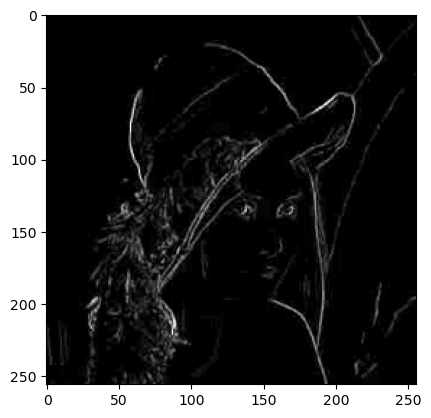

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Lena-dark.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dsize=(256, 256))
plt.imshow(img, cmap="gray")
plt.show()

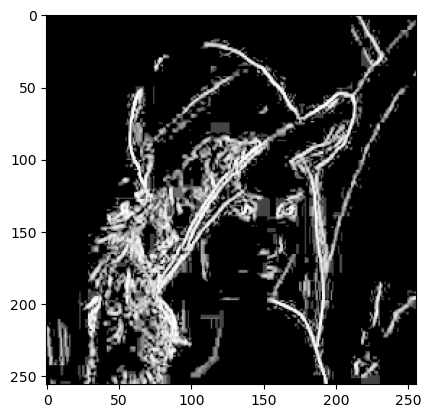

In [21]:
eq_img_inbuilt = cv2.equalizeHist(img)
plt.imshow(eq_img_inbuilt, cmap="gray")
plt.show()

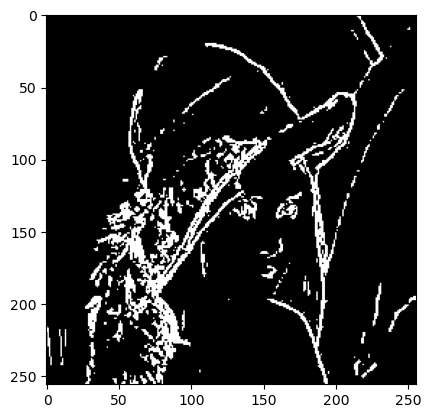

In [22]:
def histogram_equalization(img:np.ndarray):
	f_img = img.flatten()
	max_val = int(max(f_img))
	L = max_val.bit_length()
	unique = np.unique(f_img)
	cum_dist = []
	equalized_vals = []
	n = len(f_img)
	for i, x in enumerate(unique):
		count = np.count_nonzero(f_img == x)
		prob = count/n
		if i == 0:
			cum_dist.append(prob)
		else:
			cum = prob + cum_dist[len(cum_dist) - 1]
			cum_dist.append(cum)
		val = round(cum_dist[len(cum_dist) - 1] * (L-1))
		equalized_vals.append(val)
	m, n = img.shape
	equalized_img = np.empty((m, n))
	for i in range(m):
		for j in range(n):
			old_val = img[i][j]
			index = np.where(unique == old_val)[0][0]
			new_val = equalized_vals[index]
			equalized_img[i][j] = new_val
	return equalized_img

eq_img_user = histogram_equalization(img)
plt.imshow(eq_img_user, cmap="gray")
plt.show()